In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torchvision.datasets as datasets
import imageio
import numpy as np
import matplotlib
from torchvision.utils import make_grid, save_image
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt
from tqdm import tqdm

# Define learning parameters

In [2]:
# learning parameters
batch_size = 512
epochs = 100
sample_size = 64 # fixed sample size for generator
nz = 128 # latent vector size
k = 1 # number of steps to apply to the discriminator
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Prepare training dataset

In [3]:

transform = transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Normalize((0.5,),(0.5,)),
])
to_pil_image = transforms.ToPILImage()

# Make input, output folders
!mkdir -p input
!mkdir -p outputs

# Load train data
train_data = datasets.MNIST(
    root='input/data',
    train=True,
    download=True,
    transform=transform
)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file input already exists.
Error occurred while processing: input.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file outputs already exists.
Error occurred while processing: outputs.


# Generator

In [4]:
class Generator(nn.Module):
    def __init__(self, nz):
        super(Generator, self).__init__()
        self.nz = nz
        self.main = nn.Sequential(
            nn.Linear(self.nz, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 512),
            nn.LeakyReLU(0.2),
            nn.Linear(512, 1024),
            nn.LeakyReLU(0.2),
            nn.Linear(1024, 784),
            nn.Tanh(),
        )
    def forward(self, x):
        return self.main(x).view(-1, 1, 28, 28)

# Discriminator

In [5]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.n_input = 784
        self.main = nn.Sequential(
            nn.Linear(self.n_input, 1024),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid(),
        )
    def forward(self, x):
        x = x.view(-1, 784)
        return self.main(x)

In [6]:
generator = Generator(nz).to(device)
discriminator = Discriminator().to(device)
print('##### GENERATOR #####')
print(generator)
print('######################')
print('\n##### DISCRIMINATOR #####')
print(discriminator)
print('######################')

##### GENERATOR #####
Generator(
  (main): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.2)
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): LeakyReLU(negative_slope=0.2)
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)
######################

##### DISCRIMINATOR #####
Discriminator(
  (main): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): LeakyReLU(negative_slope=0.2)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=1024, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.2)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=256, bias=True)
    (7): LeakyReLU(negative_slope=0.2)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=256, out_features=1

# Tools for training

In [7]:
# optimizers
optim_g = optim.Adam(generator.parameters(), lr=0.0002)
optim_d = optim.Adam(discriminator.parameters(), lr=0.0002)

In [8]:
# loss function
criterion = nn.BCELoss() # Binary Cross Entropy loss

In [9]:
losses_g = [] # to store generator loss after each epoch
losses_d = [] # to store discriminator loss after each epoch
images = [] # to store images generatd by the generator

In [10]:
# to create real labels (1s)
def label_real(size):
    data = torch.ones(size, 1)
    return data.to(device)
# to create fake labels (0s)
def label_fake(size):
    data = torch.zeros(size, 1)
    return data.to(device)

In [11]:
# function to create the noise vector
def create_noise(sample_size, nz):
    return torch.randn(sample_size, nz).to(device)

In [12]:
# to save the images generated by the generator
def save_generator_image(image, path):
    save_image(image, path)

In [13]:
# create the noise vector - fixed to track how GAN is trained.
noise = create_noise(sample_size, nz)

# Q. Write training loop

118it [00:58,  2.01it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


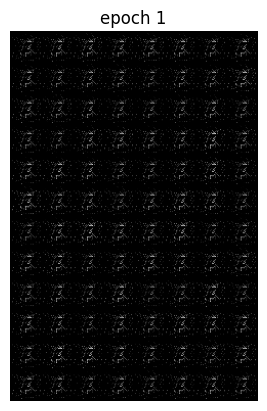

Epoch 1 of 100
Generator loss: 1.45729601, Discriminator loss: 0.91157184


118it [00:52,  2.26it/s]                         


Epoch 2 of 100
Generator loss: 2.34939671, Discriminator loss: 1.29180064


118it [00:54,  2.16it/s]                         


Epoch 3 of 100
Generator loss: 4.75465348, Discriminator loss: 0.48112954


118it [00:55,  2.13it/s]                         


Epoch 4 of 100
Generator loss: 1.89977317, Discriminator loss: 1.25133295


118it [00:55,  2.13it/s]                         


Epoch 5 of 100
Generator loss: 2.55851179, Discriminator loss: 1.02575859


118it [00:56,  2.10it/s]                         


Epoch 6 of 100
Generator loss: 2.18334896, Discriminator loss: 1.26590758


118it [00:54,  2.15it/s]                         


Epoch 7 of 100
Generator loss: 1.38492061, Discriminator loss: 1.02442129


118it [00:51,  2.30it/s]                         


Epoch 8 of 100
Generator loss: 2.26706370, Discriminator loss: 1.17766054


118it [00:51,  2.27it/s]                         


Epoch 9 of 100
Generator loss: 1.22655687, Discriminator loss: 1.12644283


118it [00:50,  2.33it/s]                         


Epoch 10 of 100
Generator loss: 1.09552553, Discriminator loss: 1.15892540


118it [00:51,  2.27it/s]                         


Epoch 11 of 100
Generator loss: 1.50233333, Discriminator loss: 0.97737191


118it [00:50,  2.33it/s]                         


Epoch 12 of 100
Generator loss: 1.62493838, Discriminator loss: 0.83166175


118it [00:50,  2.32it/s]                         


Epoch 13 of 100
Generator loss: 3.02428176, Discriminator loss: 0.62038530


118it [00:52,  2.24it/s]                         


Epoch 14 of 100
Generator loss: 3.17366442, Discriminator loss: 0.56062192


118it [00:51,  2.30it/s]                         


Epoch 15 of 100
Generator loss: 3.40762944, Discriminator loss: 0.49038108


118it [00:52,  2.25it/s]                         


Epoch 16 of 100
Generator loss: 3.85666816, Discriminator loss: 0.50675675


118it [00:51,  2.28it/s]                         


Epoch 17 of 100
Generator loss: 3.47536117, Discriminator loss: 0.47733157


118it [00:53,  2.22it/s]                         


Epoch 18 of 100
Generator loss: 3.40159060, Discriminator loss: 0.45792015


118it [00:57,  2.07it/s]                         


Epoch 19 of 100
Generator loss: 3.34736110, Discriminator loss: 0.45669588


118it [00:52,  2.23it/s]                         


Epoch 20 of 100
Generator loss: 2.71330358, Discriminator loss: 0.65051373


118it [00:52,  2.24it/s]                         


Epoch 21 of 100
Generator loss: 2.88247735, Discriminator loss: 0.38304434


118it [00:51,  2.29it/s]                         


Epoch 22 of 100
Generator loss: 2.82957862, Discriminator loss: 0.52224385


118it [00:51,  2.30it/s]                         


Epoch 23 of 100
Generator loss: 3.16060056, Discriminator loss: 0.55924595


118it [29:51, 15.18s/it]                           


Epoch 24 of 100
Generator loss: 3.17890730, Discriminator loss: 0.43272336


118it [00:54,  2.18it/s]                         


Epoch 25 of 100
Generator loss: 3.14379237, Discriminator loss: 0.38761483


118it [00:55,  2.13it/s]                         


Epoch 26 of 100
Generator loss: 2.96496137, Discriminator loss: 0.53185168


118it [00:53,  2.20it/s]                         


Epoch 27 of 100
Generator loss: 2.76855544, Discriminator loss: 0.56947601


118it [00:55,  2.14it/s]                         


Epoch 28 of 100
Generator loss: 3.01558244, Discriminator loss: 0.52886812


118it [00:56,  2.10it/s]                         


Epoch 29 of 100
Generator loss: 2.88734149, Discriminator loss: 0.52638472


118it [00:58,  2.03it/s]                         


Epoch 30 of 100
Generator loss: 3.02110111, Discriminator loss: 0.54874328


118it [00:55,  2.12it/s]                         


Epoch 31 of 100
Generator loss: 2.90315192, Discriminator loss: 0.52148887


118it [00:59,  1.97it/s]                         


Epoch 32 of 100
Generator loss: 3.09254452, Discriminator loss: 0.45100457


118it [00:53,  2.21it/s]                         


Epoch 33 of 100
Generator loss: 3.23647949, Discriminator loss: 0.40563084


118it [00:52,  2.27it/s]                         


Epoch 34 of 100
Generator loss: 2.94851352, Discriminator loss: 0.46987716


118it [00:54,  2.16it/s]                         


Epoch 35 of 100
Generator loss: 2.97727057, Discriminator loss: 0.55851527


118it [00:53,  2.22it/s]                         


Epoch 36 of 100
Generator loss: 2.88356347, Discriminator loss: 0.52891384


118it [00:52,  2.23it/s]                         


Epoch 37 of 100
Generator loss: 2.90074629, Discriminator loss: 0.53162098


118it [00:52,  2.24it/s]                         


Epoch 38 of 100
Generator loss: 2.99283405, Discriminator loss: 0.47362093


118it [00:51,  2.28it/s]                         


Epoch 39 of 100
Generator loss: 2.95674942, Discriminator loss: 0.47482530


118it [00:54,  2.17it/s]                         


Epoch 40 of 100
Generator loss: 2.83821386, Discriminator loss: 0.52019602


118it [00:52,  2.25it/s]                         


Epoch 41 of 100
Generator loss: 2.67298773, Discriminator loss: 0.57763050


118it [00:53,  2.20it/s]                         


Epoch 42 of 100
Generator loss: 2.75369705, Discriminator loss: 0.57462978


118it [00:51,  2.28it/s]                         


Epoch 43 of 100
Generator loss: 2.69726687, Discriminator loss: 0.59245460


118it [00:52,  2.26it/s]                         


Epoch 44 of 100
Generator loss: 2.92781825, Discriminator loss: 0.53725160


118it [00:51,  2.28it/s]                         


Epoch 45 of 100
Generator loss: 2.81810392, Discriminator loss: 0.51689883


118it [00:52,  2.25it/s]                         


Epoch 46 of 100
Generator loss: 2.99666984, Discriminator loss: 0.52933083


118it [00:52,  2.24it/s]                         


Epoch 47 of 100
Generator loss: 2.67993961, Discriminator loss: 0.60501056


118it [28:55, 14.71s/it]                            


Epoch 48 of 100
Generator loss: 2.80960597, Discriminator loss: 0.54326083


118it [00:51,  2.29it/s]                         


Epoch 49 of 100
Generator loss: 2.81033307, Discriminator loss: 0.52654017


118it [01:09,  1.71it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


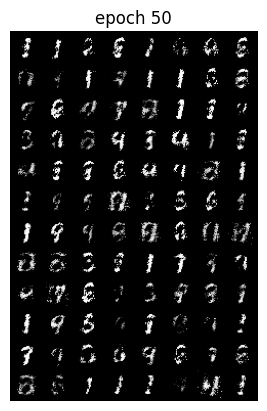

Epoch 50 of 100
Generator loss: 2.67438750, Discriminator loss: 0.61044850


118it [01:25,  1.37it/s]                         


Epoch 51 of 100
Generator loss: 2.70888230, Discriminator loss: 0.59118691


118it [01:26,  1.37it/s]                         


Epoch 52 of 100
Generator loss: 2.86703334, Discriminator loss: 0.54271005


118it [01:25,  1.38it/s]                         


Epoch 53 of 100
Generator loss: 2.84031701, Discriminator loss: 0.57304095


118it [01:24,  1.39it/s]                         


Epoch 54 of 100
Generator loss: 2.66024473, Discriminator loss: 0.57073850


118it [01:25,  1.38it/s]                         


Epoch 55 of 100
Generator loss: 2.66565243, Discriminator loss: 0.68882607


118it [1:47:26, 54.63s/it]                             


Epoch 56 of 100
Generator loss: 2.38628348, Discriminator loss: 0.64144890


118it [00:59,  1.98it/s]                         


Epoch 57 of 100
Generator loss: 2.46767184, Discriminator loss: 0.59044578


118it [00:56,  2.09it/s]                         


Epoch 58 of 100
Generator loss: 2.62049469, Discriminator loss: 0.57778234


118it [00:56,  2.08it/s]                         


Epoch 59 of 100
Generator loss: 2.40523330, Discriminator loss: 0.66731591


118it [00:47,  2.51it/s]                         


Epoch 60 of 100
Generator loss: 2.53642162, Discriminator loss: 0.68709509


118it [00:46,  2.51it/s]                         


Epoch 61 of 100
Generator loss: 2.35235020, Discriminator loss: 0.67726064


118it [00:50,  2.34it/s]                         


Epoch 62 of 100
Generator loss: 2.33134200, Discriminator loss: 0.62526434


118it [00:49,  2.37it/s]                         


Epoch 63 of 100
Generator loss: 2.29330010, Discriminator loss: 0.72321665


118it [00:47,  2.47it/s]                         


Epoch 64 of 100
Generator loss: 2.27200279, Discriminator loss: 0.70954394


118it [00:48,  2.45it/s]                         


Epoch 65 of 100
Generator loss: 2.50906586, Discriminator loss: 0.64556182


118it [00:49,  2.37it/s]                         


Epoch 66 of 100
Generator loss: 2.31238408, Discriminator loss: 0.67561111


118it [00:51,  2.29it/s]                         


Epoch 67 of 100
Generator loss: 2.30017838, Discriminator loss: 0.65693292


118it [55:09, 28.05s/it]                           


Epoch 68 of 100
Generator loss: 2.37081092, Discriminator loss: 0.64280395


118it [00:51,  2.30it/s]                         


Epoch 69 of 100
Generator loss: 2.39793788, Discriminator loss: 0.63698614


118it [01:13,  1.60it/s]                         


Epoch 70 of 100
Generator loss: 2.50072381, Discriminator loss: 0.65427285


118it [01:25,  1.38it/s]                         


Epoch 71 of 100
Generator loss: 2.36657771, Discriminator loss: 0.64412038


118it [01:25,  1.38it/s]                         


Epoch 72 of 100
Generator loss: 2.18287214, Discriminator loss: 0.66454986


118it [01:25,  1.38it/s]                         


Epoch 73 of 100
Generator loss: 2.30561278, Discriminator loss: 0.69324224


118it [01:25,  1.38it/s]                         


Epoch 74 of 100
Generator loss: 2.36107175, Discriminator loss: 0.65794597


118it [01:25,  1.38it/s]                         


Epoch 75 of 100
Generator loss: 2.43396150, Discriminator loss: 0.63989963


118it [01:35,  1.23it/s]                         


Epoch 76 of 100
Generator loss: 2.42980579, Discriminator loss: 0.69143884


118it [00:46,  2.53it/s]                         


Epoch 77 of 100
Generator loss: 2.25171084, Discriminator loss: 0.68536732


118it [01:07,  1.75it/s]                         


Epoch 78 of 100
Generator loss: 2.30232156, Discriminator loss: 0.70662114


118it [01:25,  1.38it/s]                         


Epoch 79 of 100
Generator loss: 2.14887876, Discriminator loss: 0.73032121


118it [01:26,  1.36it/s]                         


Epoch 80 of 100
Generator loss: 2.13365115, Discriminator loss: 0.72156024


118it [01:25,  1.38it/s]                         


Epoch 81 of 100
Generator loss: 2.25831293, Discriminator loss: 0.73250928


118it [01:25,  1.38it/s]                         


Epoch 82 of 100
Generator loss: 2.13677702, Discriminator loss: 0.71951273


118it [01:25,  1.38it/s]                         


Epoch 83 of 100
Generator loss: 2.06563565, Discriminator loss: 0.74295569


118it [20:07, 10.23s/it]                           


Epoch 84 of 100
Generator loss: 2.04205690, Discriminator loss: 0.75442189


118it [00:52,  2.26it/s]                         


Epoch 85 of 100
Generator loss: 2.16294017, Discriminator loss: 0.74049415


118it [00:56,  2.08it/s]                         


Epoch 86 of 100
Generator loss: 2.09136544, Discriminator loss: 0.75597855


118it [00:57,  2.04it/s]                         


Epoch 87 of 100
Generator loss: 2.06724665, Discriminator loss: 0.77748132


118it [00:53,  2.23it/s]                         


Epoch 88 of 100
Generator loss: 2.02598494, Discriminator loss: 0.77883685


118it [00:46,  2.51it/s]                         


Epoch 89 of 100
Generator loss: 2.05014247, Discriminator loss: 0.81211336


118it [00:47,  2.49it/s]                         


Epoch 90 of 100
Generator loss: 1.94854262, Discriminator loss: 0.81478430


118it [00:48,  2.45it/s]                         


Epoch 91 of 100
Generator loss: 1.97199211, Discriminator loss: 0.83287932


118it [00:47,  2.48it/s]                         


Epoch 92 of 100
Generator loss: 2.03062194, Discriminator loss: 0.78745278


118it [00:47,  2.47it/s]                         


Epoch 93 of 100
Generator loss: 1.99877817, Discriminator loss: 0.79367163


118it [00:48,  2.42it/s]                         


Epoch 94 of 100
Generator loss: 2.01835807, Discriminator loss: 0.78007050


118it [00:50,  2.32it/s]                         


Epoch 95 of 100
Generator loss: 1.97345417, Discriminator loss: 0.77479890


118it [00:51,  2.29it/s]                         


Epoch 96 of 100
Generator loss: 2.07438344, Discriminator loss: 0.74479304


118it [37:48, 19.23s/it]                            


Epoch 97 of 100
Generator loss: 2.05513328, Discriminator loss: 0.77910860


118it [00:48,  2.43it/s]                         


Epoch 98 of 100
Generator loss: 1.96191574, Discriminator loss: 0.86480820


118it [00:57,  2.04it/s]                         


Epoch 99 of 100
Generator loss: 1.94913530, Discriminator loss: 0.81876420


118it [00:58,  2.03it/s]                         
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


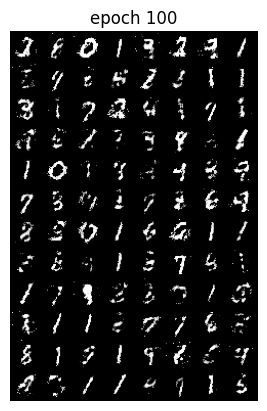

Epoch 100 of 100
Generator loss: 1.89314506, Discriminator loss: 0.81086855


In [14]:
torch.manual_seed(7777)

def generator_loss(output, true_label):
    ############ YOUR CODE HERE ##########
    return criterion(output, true_label)
    ######################################
    
def discriminator_loss(real_output, fake_output, real_label, fake_label):
    ############ YOUR CODE HERE ##########
    return (criterion(real_output, real_label) + criterion(fake_output, fake_label))
    ######################################
for epoch in range(epochs):
    loss_g = 0.0
    loss_d = 0.0
    for bi, data in tqdm(enumerate(train_loader), total=int(len(train_data)/train_loader.batch_size)):
        ############ YOUR CODE HERE ########## 
        image, _ = data #image is a tensor representation the input image 
        image = image.to(device)
        b_size = len(image)

        real_data = image.view(b_size, -1) #reshape this tensor to a 2D tensor with dimensions (batch_size, -1).
        real_label = label_real(b_size)
        real_output = discriminator(real_data)

        noise = create_noise(b_size, nz)
        fake_data = generator(noise)
        fake_label = label_fake(b_size)
        fake_output = discriminator(fake_data)

        d_loss = discriminator_loss(real_output, fake_output, real_label, fake_label)
        optim_d.zero_grad()
        d_loss.backward()
        optim_d.step()

        #train generator 
        noise = create_noise(b_size, nz)
        fake_data = generator(noise)
        output = discriminator(fake_data)

        g_loss = generator_loss(output, real_label)
        optim_g.zero_grad()
        g_loss.backward()
        optim_g.step()

        loss_g += g_loss.item()
        loss_d += d_loss.item()
        ######################################
    
    
    # create the final fake image for the epoch
    generated_img = generator(noise).cpu().detach()
    
    # make the images as grid
    generated_img = make_grid(generated_img)
    
    # visualize generated images
    if epoch == 0 or epoch == 49 or epoch == 99:
        plt.imshow(generated_img.permute(1, 2, 0))
        plt.title(f'epoch {epoch+1}')
        plt.axis('off')
        plt.show()
    
        
    # save the generated torch tensor models to disk
    save_generator_image(generated_img, f"outputs/gen_img{epoch+1}.png")
    images.append(generated_img)
    epoch_loss_g = loss_g / bi # total generator loss for the epoch
    epoch_loss_d = loss_d / bi # total discriminator loss for the epoch
    losses_g.append(epoch_loss_g)
    losses_d.append(epoch_loss_d)
    
    print(f"Epoch {epoch+1} of {epochs}")
    print(f"Generator loss: {epoch_loss_g:.8f}, Discriminator loss: {epoch_loss_d:.8f}")

In [15]:
print('DONE TRAINING')
torch.save(generator.state_dict(), 'outputs/generator.pth')

DONE TRAINING


In [16]:
# save the generated images as GIF file
imgs = [np.array(to_pil_image(img)) for img in images]
imageio.mimsave('outputs/generator_images.gif', imgs)

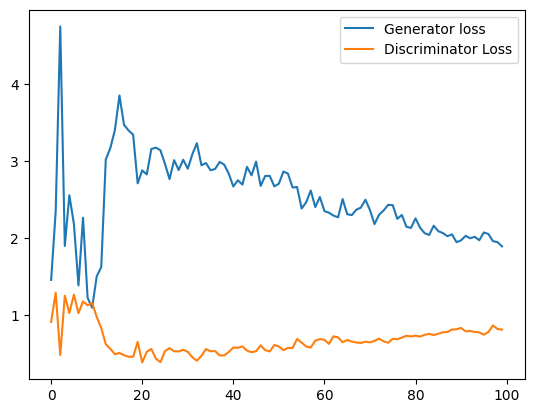

In [17]:
# plot and save the generator and discriminator loss
plt.figure()
plt.plot(losses_g, label='Generator loss')
plt.plot(losses_d, label='Discriminator Loss')
plt.legend()
plt.savefig('outputs/loss.png')